In [1]:
import ast
import pandas as pd
import torch

from data_processing import save_probabilities
from visualization import view_plateau

In [2]:
# checkpoint = torch.load('../saved_models/orthography_3gen.pth')
# train_char_probs = checkpoint['train_char_prediction_probs']
# valid_char_probs = checkpoint['valid_char_prediction_probs']

# save_probabilities(valid_char_probs, nlexique[['lexeme', 'gen']], '../results/orthography_3gen.csv', mode='w', set='validation')
# save_probabilities(train_char_probs, nlexique[['lexeme', 'gen']], '../results/orthography_3gen.csv', mode='a', set='train')

# or3_results = pd.read_csv('../results/orthography_3gen.csv')
# or3_results

In [3]:
# or3_results['Noun_Length'] = or3_results['Nouns'].apply(len)
# or3_results['Probabilities_Length'] = or3_results['Class Probabilities'].apply(lambda x: len(ast.literal_eval(x)))

# filtered_df = or3_results[or3_results['Probabilities_Length'] != or3_results['Noun_Length']]

# filtered_df

## Suffix vs Non-suffix Words

In [4]:
nlexique = pd.read_csv('../data/nlexique.csv')
nlexique = nlexique[['lexeme', 'sg', 'gen']].rename(columns={'sg': 'phon'}).dropna().reset_index(drop=True)
nlexique

,lexeme,phon,gen
0,à-côté,akOte,m
1,à-coup,aku,m
2,à-peu-près,apØpʁɛ,m
3,à-pic,apik,m
4,à-plat,apla,m
...,...,...,...
30999,zurichois,zyʁikwa,m
31000,zydeco,zidəko,f
31001,zygoma,zigOma,m
31002,zygote,zigɔt,m


In [5]:
echantinom = pd.read_csv('../data/Echantinom-full-20210902.csv')
echantinom = echantinom[~echantinom['lemma'].isin(nlexique[nlexique['gen'] == 'b']['lexeme'])][['lemma', 'phon', 'gen']]
echantinom

,lemma,phon,gen
0,berlingue,bɛʁ.lɛ̃g,m
1,corton,kɔʁ.tɔ̃,m
2,dabuche,da.byʃ,f
3,faf,faf,m
4,gail,gaj,f
...,...,...,...
4995,palu,pa.ly,m
4996,talc,talk,m
4997,sauvetage,sO.və.taʒ,m
4998,plaid,plɛd,m


### Orthographic forms

In [6]:
orth_preds = pd.read_csv('../results/echantinom_orth_preds.csv')
orth_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set
0,bi,bi,m,m,"[('i', {'f': 0.10226600617170334, 'm': 0.89773...",test
1,as,as,m,m,"[('s', {'f': 0.2900664508342743, 'm': 0.709933...",test
2,an,ɑ̃,m,m,"[('n', {'f': 0.6975879669189453, 'm': 0.302412...",test
3,té,te,m,m,"[('é', {'f': 0.21048486232757568, 'm': 0.78951...",test
4,mob,mɔb,m,f,"[('b', {'f': 0.24886830151081085, 'm': 0.75113...",test
...,...,...,...,...,...,...
4529,sous-alimentation,suzalimɑ̃tasjɔ̃,f,f,"[('n', {'f': 0.6975879669189453, 'm': 0.302412...",test
4530,approvisionnement,apʁOvizjɔnəmɑ̃,m,m,"[('t', {'f': 0.33767399191856384, 'm': 0.66232...",test
4531,cul-de-basse-fosse,kydəbasəfos,m,m,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test
4532,transsubstantiation,tʁɑ̃ssypstɑ̃tjasjɔ̃,f,f,"[('n', {'f': 0.6975879669189453, 'm': 0.302412...",test


In [7]:
orth_correct = orth_preds[orth_preds['Predicted Gender'] == orth_preds['True Gender']]

orth_percentage_correct = (orth_correct.shape[0] / orth_preds.shape[0]) * 100
orth_percentage_correct


90.69254521393913

In [8]:
incorrect = orth_preds[orth_preds['Predicted Gender'] != orth_preds['True Gender']]
incorrect

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set
4,mob,mɔb,m,f,"[('b', {'f': 0.24886830151081085, 'm': 0.75113...",test
6,mer,mɛʁ,m,f,"[('r', {'f': 0.3038800358772278, 'm': 0.696119...",test
10,glu,gly,m,f,"[('u', {'f': 0.5225964784622192, 'm': 0.477403...",test
16,clé,kle,m,f,"[('é', {'f': 0.21048486232757568, 'm': 0.78951...",test
30,ire,iʁ,m,f,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test
...,...,...,...,...,...,...
4493,lance-missiles,lɑ̃smisil,f,m,"[('s', {'f': 0.2900664508342743, 'm': 0.709933...",test
4496,côtes-du-rhône,kotdyʁon,f,m,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test
4513,perpendiculaire,pɛʁpɑ̃dikylɛʁ,m,f,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test
4522,homme-grenouille,ɔmgʁənuj,f,m,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test


In [9]:
# [word for word in echantinom_preds['Word'].tolist() if word.endswith('age')]

In [10]:
# from matplotlib import pyplot as plt

# def plot_prediction_curve(word, predictions, true_class, binary=False):
#     """
#     If binary=True, plots the evolution of the true class probabilities over characters. 
#     Otherwise, plots the evolution of all class probabilities. 
#     """
#     class_names = list(predictions[0][1].keys())
#     if binary:
#         class_names = [true_class]  # cleaner to only plot the evolution of the true class
#     class_probs = [[tup[1][key] for tup in predictions] for key in class_names]
#     characters = [tup[0] for tup in predictions]
#     colors = {'m': 'steelblue', 'f': 'green', 'b': 'orange'}
#     plt.style.use('ggplot')
#     for i, class_i in enumerate(class_probs):
#         plt.plot(range(len(characters)), class_i, color=colors[class_names[i]], marker='x' , label=class_names[i])
#         for j, prob in enumerate(class_i):
#             plt.text(j, prob, f'{prob:.2f}', ha='center', va='bottom', fontsize=8)  # Add probabilities as text
#     plt.title(f'Probability of each gender at each character position in "{word}"')
#     plt.xlabel('Character indecies')
#     plt.ylabel('Probability')
#     plt.xticks(range(len(characters)), characters)
#     plt.legend()
#     plt.show()
#     # print(f'Probability values:\n  {predictions}')


# def view_plateau(word, df, binary=False):
#     """
#     Checks to see if the word exists in the dataset and if so, plots the class probabilities at each character position for each run
#     """
#     if word in df['Form'].to_list():
#         probabilities = df[df['Form'] == word]['Class Probabilities'].apply(lambda x: ast.literal_eval(x)).tolist()
#         true_class = df[df['Form'] == word]['True Gender'].iloc[0]
#         for run in probabilities:	
#             plot_prediction_curve(word, run, true_class=true_class, binary=binary)

#     else:
#         print(f'{word} not found.')


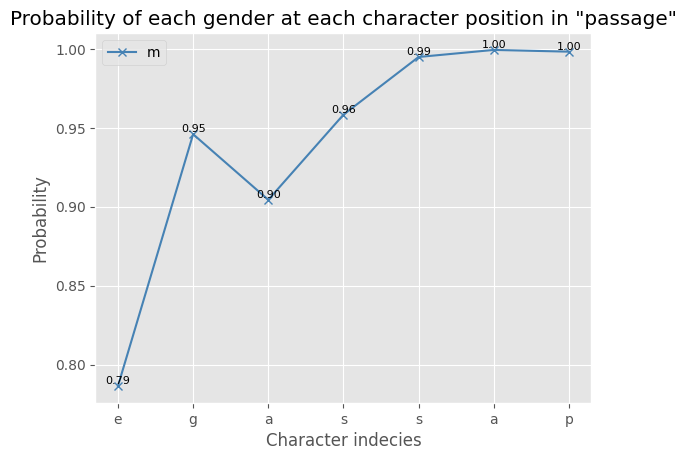

----------------------------------------------------------------------------------------------------



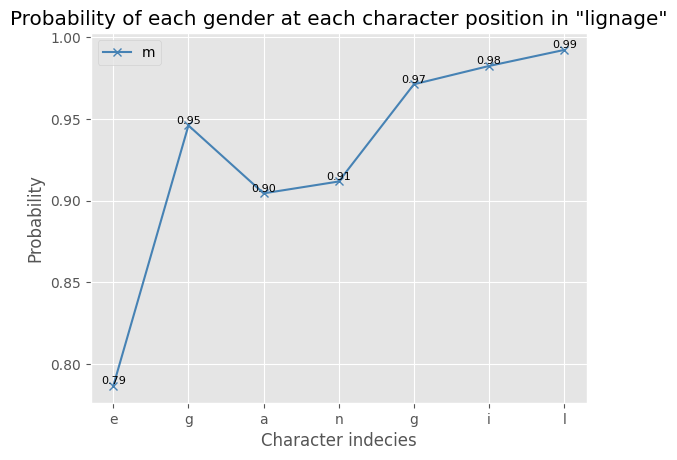

----------------------------------------------------------------------------------------------------



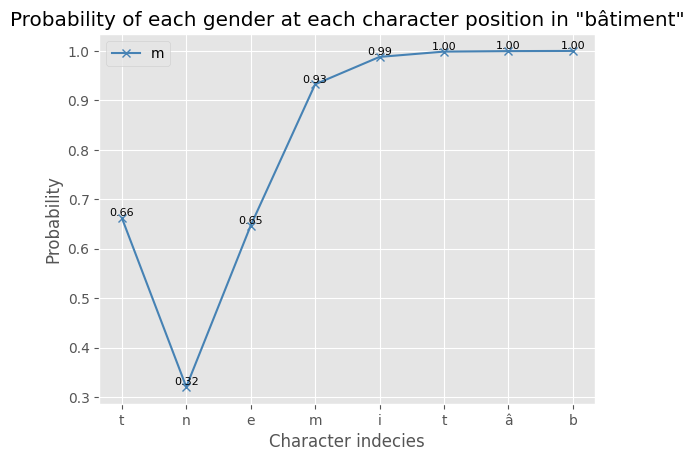

----------------------------------------------------------------------------------------------------



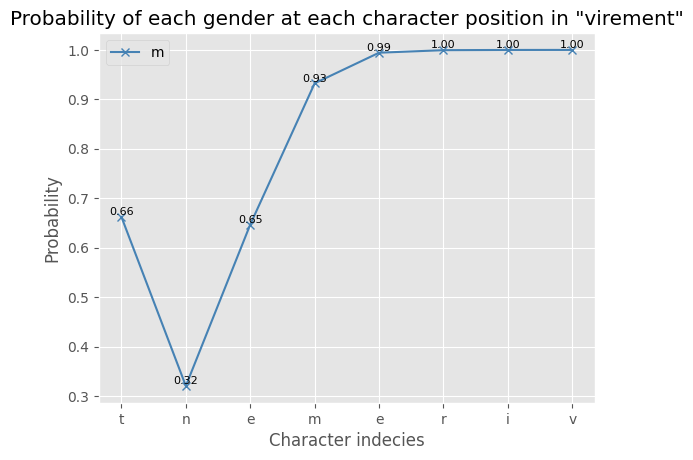

----------------------------------------------------------------------------------------------------



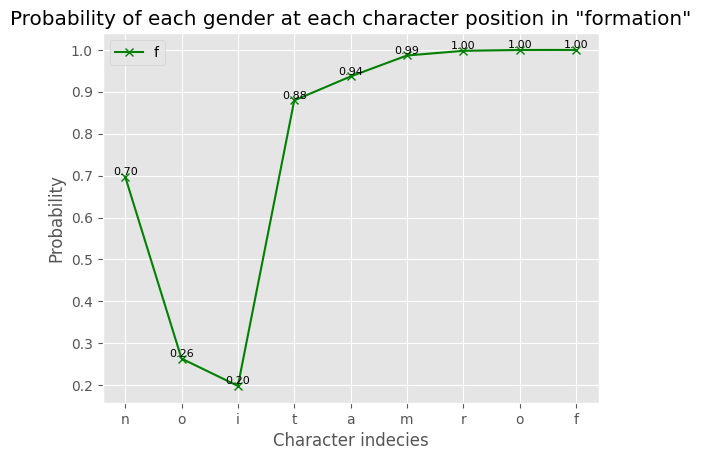

----------------------------------------------------------------------------------------------------



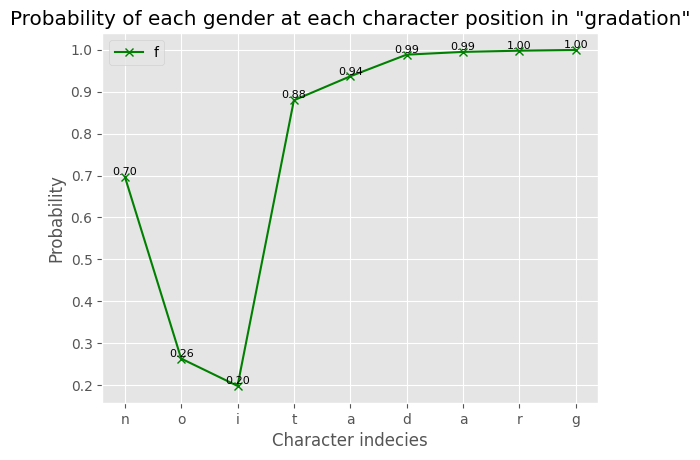

In [11]:
view_plateau('passage', orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('lignage', orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('bâtiment', orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('virement', orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('formation', orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('gradation', orth_preds, binary=True)

In [12]:
orth_preds_x10 = pd.read_csv('../results/echantinom_orth_preds_x10.csv')
orth_preds_x10

,Form,Predicted Gender,True Gender,Class Probabilities,Set,Run
0,an,m,m,"[('n', {'f': 0.4085073173046112, 'm': 0.591492...",test,1
1,bi,m,m,"[('i', {'f': 0.16074861586093903, 'm': 0.83925...",test,1
2,as,m,m,"[('s', {'f': 0.2868475317955017, 'm': 0.713152...",test,1
3,té,m,m,"[('é', {'f': 0.3696044683456421, 'm': 0.630395...",test,1
4,pie,f,f,"[('e', {'f': 0.11107771843671799, 'm': 0.88892...",test,1
...,...,...,...,...,...,...
45315,approvisionnement,m,m,"[('t', {'f': 0.07809196412563324, 'm': 0.92190...",test,10
45316,sous-alimentation,f,f,"[('n', {'f': 0.38623788952827454, 'm': 0.61376...",test,10
45317,cul-de-basse-fosse,m,m,"[('e', {'f': 0.23680555820465088, 'm': 0.76319...",test,10
45318,marie-couche-toi-là,f,f,"[('à', {'f': 0.28149473667144775, 'm': 0.71850...",test,10


In [13]:
orth_preds_x10[orth_preds_x10['Form'] == 'gradation']

,Form,Predicted Gender,True Gender,Class Probabilities,Set,Run
3275,gradation,f,f,"[('n', {'f': 0.4085073173046112, 'm': 0.591492...",test,1
7720,gradation,f,f,"[('n', {'f': 0.30895906686782837, 'm': 0.69104...",test,2
12087,gradation,f,f,"[('n', {'f': 0.7717419266700745, 'm': 0.228258...",test,3
16996,gradation,f,f,"[('n', {'f': 0.4002501368522644, 'm': 0.599749...",test,4
21396,gradation,f,f,"[('n', {'f': 0.3324614465236664, 'm': 0.667538...",test,5
26114,gradation,f,f,"[('n', {'f': 0.5791807174682617, 'm': 0.420819...",test,6
30346,gradation,f,f,"[('n', {'f': 0.3617360591888428, 'm': 0.638263...",test,7
34831,gradation,f,f,"[('n', {'f': 0.4872220754623413, 'm': 0.512777...",test,8
39509,gradation,f,f,"[('n', {'f': 0.6699172258377075, 'm': 0.330082...",test,9
43801,gradation,f,f,"[('n', {'f': 0.38623788952827454, 'm': 0.61376...",test,10


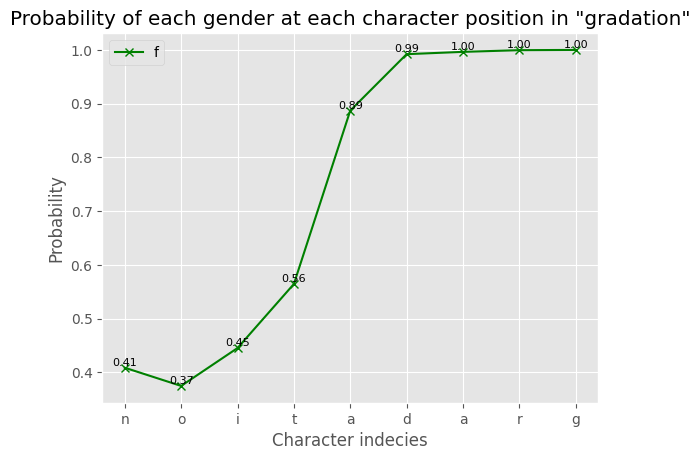

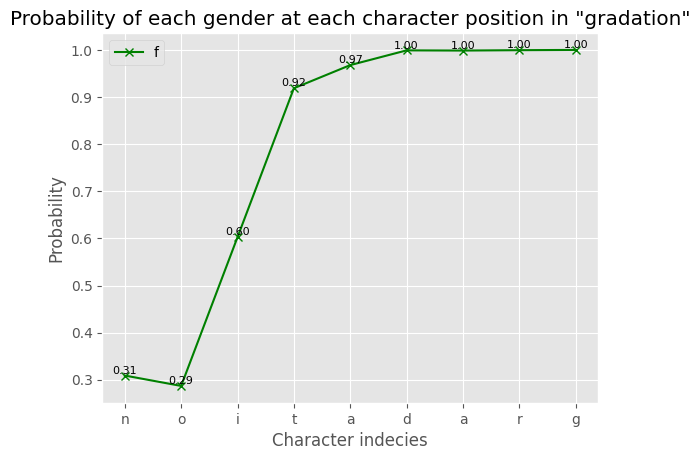

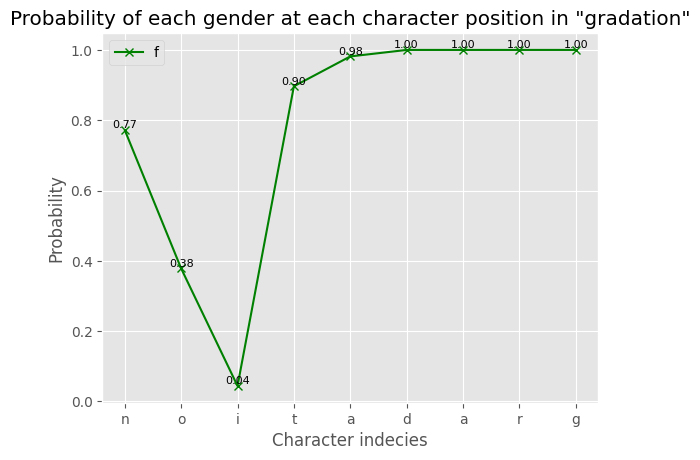

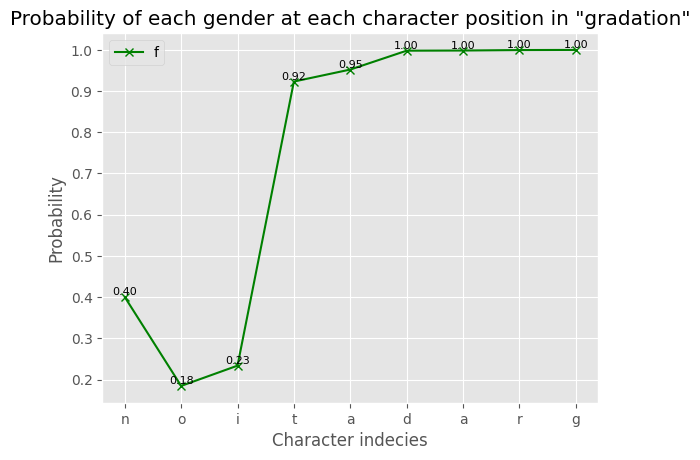

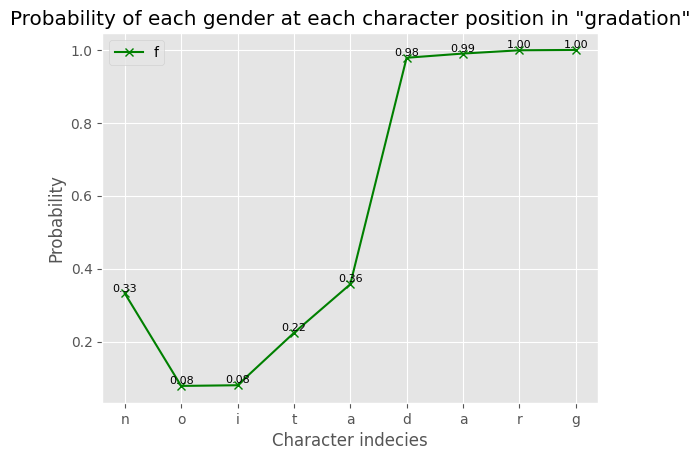

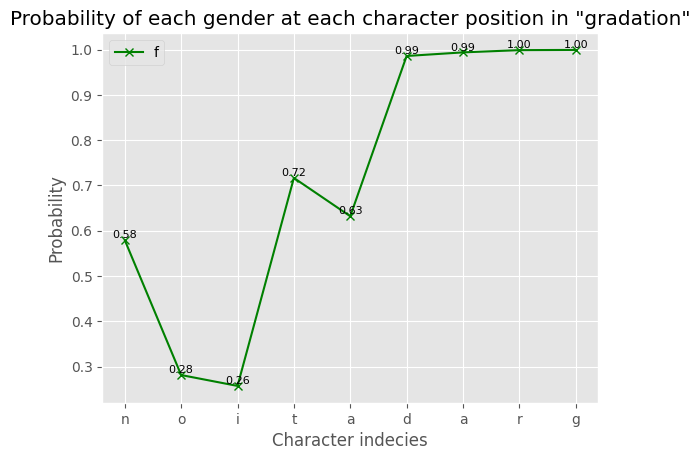

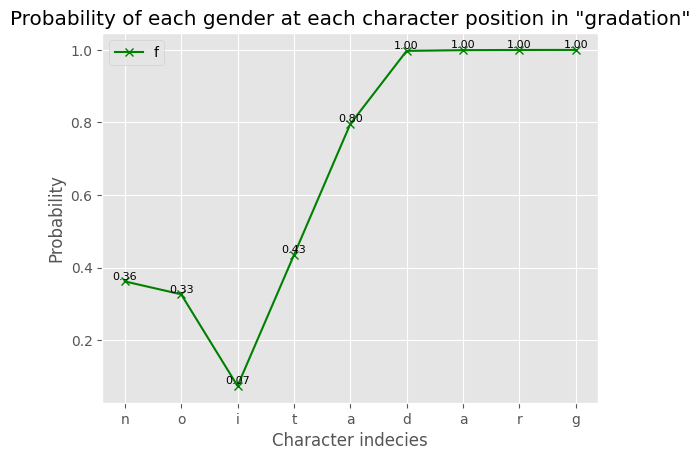

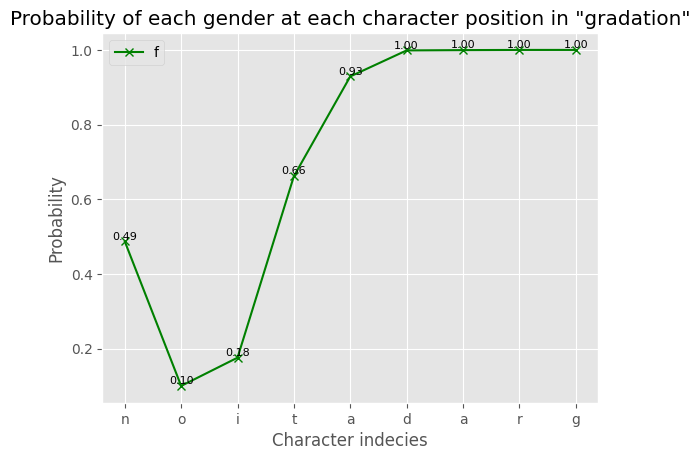

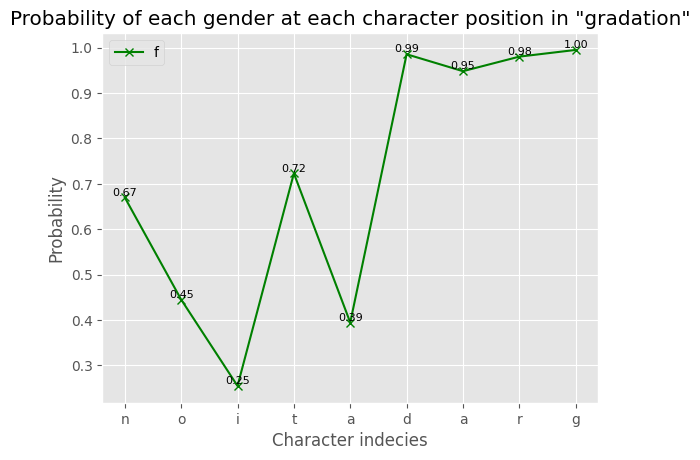

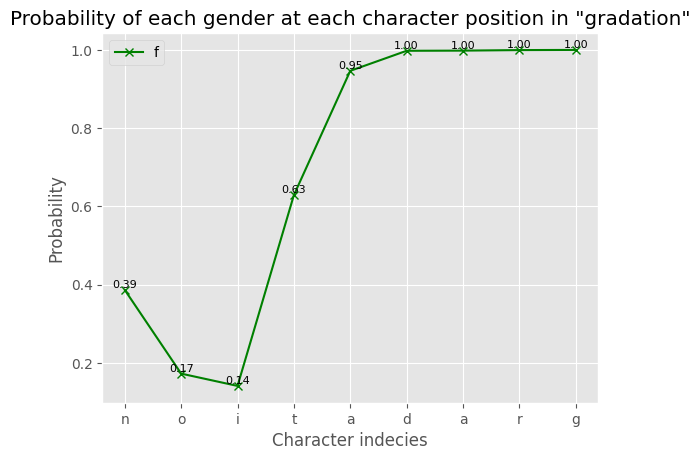

In [14]:
view_plateau('gradation', orth_preds_x10, binary=True)

### Phonetic forms

In [15]:
phon_preds = pd.read_csv('../results/echantinom_phon_preds.csv')
phon_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set
0,u,houx,m,m,"[('u', {'f': 0.5169596672058105, 'm': 0.483040...",test
1,ɛ,ais,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test
2,ɛ,haie,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test
3,o,eau,m,f,"[('o', {'f': 0.6822937726974487, 'm': 0.317706...",test
4,ɛ,ais,m,m,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test
...,...,...,...,...,...,...
4587,ɛ̃sybɔʁdinasjɔ̃,insubordination,f,f,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test
4588,tʁɑ̃splɑ̃tasjɔ̃,transplantation,f,f,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test
4589,kɔ̃fidɑ̃sjalite,confidentialité,f,f,"[('e', {'f': 0.48355355858802795, 'm': 0.51644...",test
4590,ɛ̃kɔ̃patibilite,incompatibilité,f,f,"[('e', {'f': 0.48355355858802795, 'm': 0.51644...",test


In [16]:
phon_preds['Noun_Length'] = phon_preds['Form'].apply(len)
phon_preds['Probabilities_Length'] = phon_preds['Class Probabilities'].apply(lambda x: len(ast.literal_eval(x)))

filtered_df = phon_preds[phon_preds['Probabilities_Length'] != phon_preds['Noun_Length']]

filtered_df

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,Noun_Length,Probabilities_Length


In [17]:
phon_correct = phon_preds[phon_preds['Predicted Gender'] == phon_preds['True Gender']]

phon_percentage_correct = (phon_correct.shape[0] / phon_preds.shape[0]) * 100
phon_percentage_correct


77.11236933797909

In [18]:
phon_incorrect = phon_preds[phon_preds['Predicted Gender'] != phon_preds['True Gender']]
phon_incorrect

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,Noun_Length,Probabilities_Length
1,ɛ,ais,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test,1,1
2,ɛ,haie,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test,1,1
3,o,eau,m,f,"[('o', {'f': 0.6822937726974487, 'm': 0.317706...",test,1,1
7,aj,ail,f,m,"[('j', {'f': 0.24457314610481262, 'm': 0.75542...",test,2,2
8,yp,huppe,m,f,"[('p', {'f': 0.4050317704677582, 'm': 0.594968...",test,2,2
...,...,...,...,...,...,...,...,...
4511,bɛʁnaʁlɛʁmit,bernard-l'ermite,f,m,"[('t', {'f': 0.4614095389842987, 'm': 0.538590...",test,12,12
4536,kɔ̃vɑ̃sjOnɛl,conventionnel,f,m,"[('l', {'f': 0.3344738185405731, 'm': 0.665526...",test,12,12
4544,kɔ̃tʁəpwazɔ̃,contrepoison,f,m,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,12,12
4557,mOdysOpEʁɑ̃di,modus operandi,f,m,"[('i', {'f': 0.1249736100435257, 'm': 0.875026...",test,13,13


In [19]:
nlexique[nlexique['lexeme'].isin(['passage', 'lignage', 'bâtiment', 'virement', 'formation', 'gradation'])]

,lexeme,phon,gen
2918,bâtiment,batimɑ̃,m
12741,formation,fɔʁmasjɔ̃,f
14020,gradation,gʁadasjɔ̃,f
17177,lignage,liɲaʒ,m
21487,passage,pasaʒ,m
30582,virement,viʁəmɑ̃,m


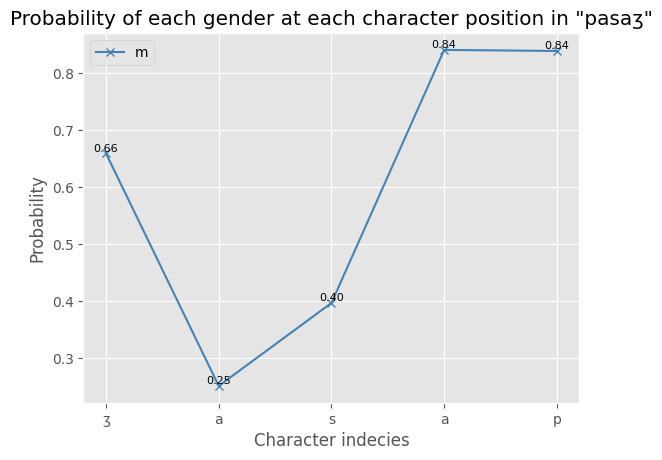

----------------------------------------------------------------------------------------------------



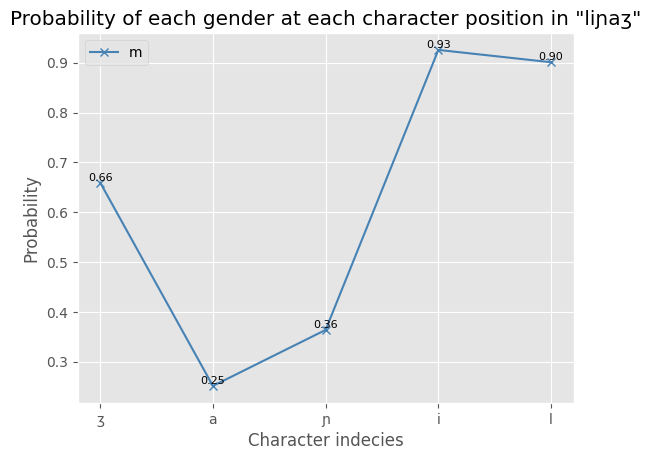

----------------------------------------------------------------------------------------------------



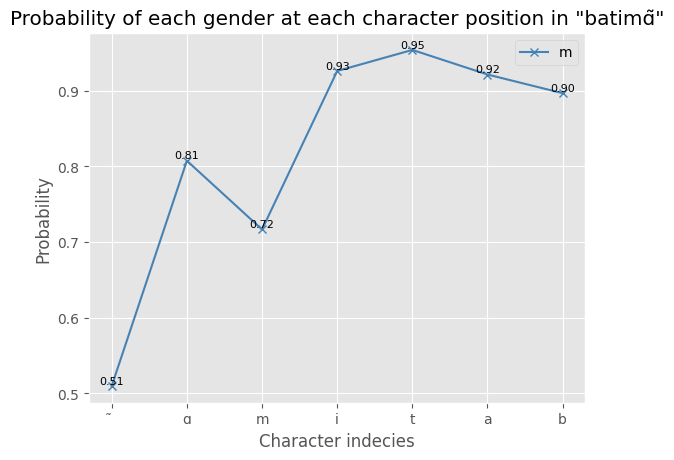

----------------------------------------------------------------------------------------------------



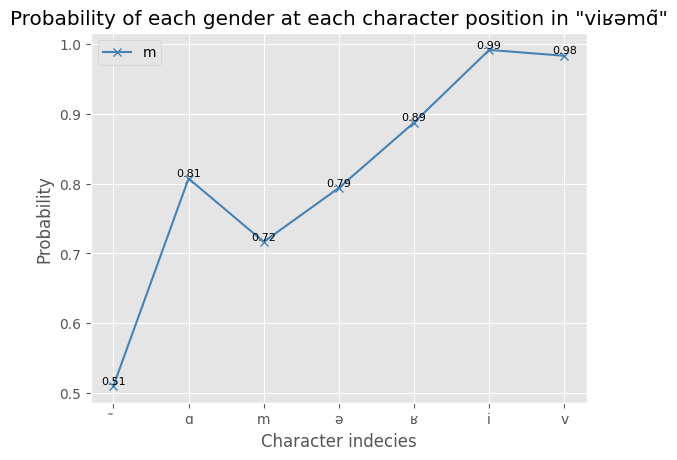

----------------------------------------------------------------------------------------------------



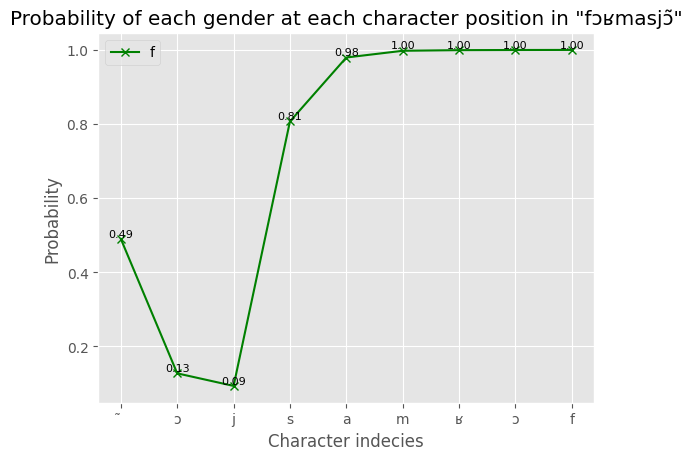

----------------------------------------------------------------------------------------------------



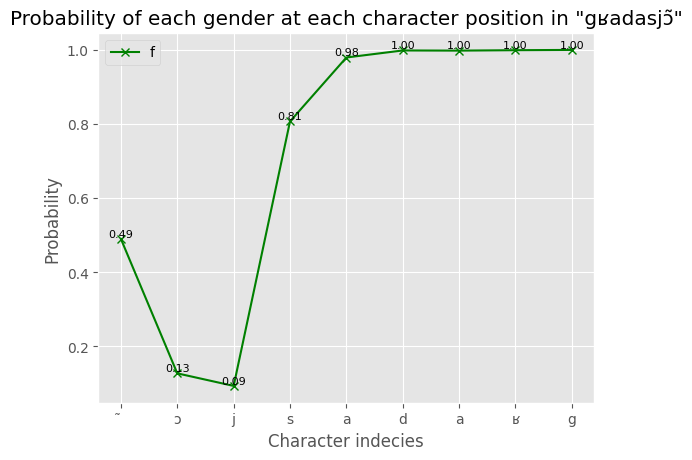

In [20]:
view_plateau('pasaʒ', phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('liɲaʒ', phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('batimɑ̃', phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('viʁəmɑ̃', phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('fɔʁmasjɔ̃', phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('gʁadasjɔ̃', phon_preds, binary=True)

In [21]:
phon_preds_x10 = pd.read_csv('../results/echantinom_phon_preds_x10.csv')
phon_preds_x10

,Form,Predicted Gender,True Gender,Class Probabilities,Set,Run
0,ɛ,m,f,"[('ɛ', {'f': 0.14882417023181915, 'm': 0.85117...",test,1
1,u,f,m,"[('u', {'f': 0.3157658278942108, 'm': 0.684234...",test,1
2,ɛ,m,m,"[('ɛ', {'f': 0.14882417023181915, 'm': 0.85117...",test,1
3,o,m,f,"[('o', {'f': 0.5670557618141174, 'm': 0.432944...",test,1
4,ba,m,m,"[('a', {'f': 0.39993923902511597, 'm': 0.60006...",test,1
...,...,...,...,...,...,...
45315,kɔ̃fidɑ̃sjalite,f,f,"[('e', {'f': 0.5326544642448425, 'm': 0.467345...",test,10
45316,ɛ̃kɔ̃patibilite,f,f,"[('e', {'f': 0.5326544642448425, 'm': 0.467345...",test,10
45317,suzalimɑ̃tasjɔ̃,f,f,"[('̃', {'f': 0.6368642449378967, 'm': 0.363135...",test,10
45318,tʁɑ̃splɑ̃tasjɔ̃,f,f,"[('̃', {'f': 0.6368642449378967, 'm': 0.363135...",test,10


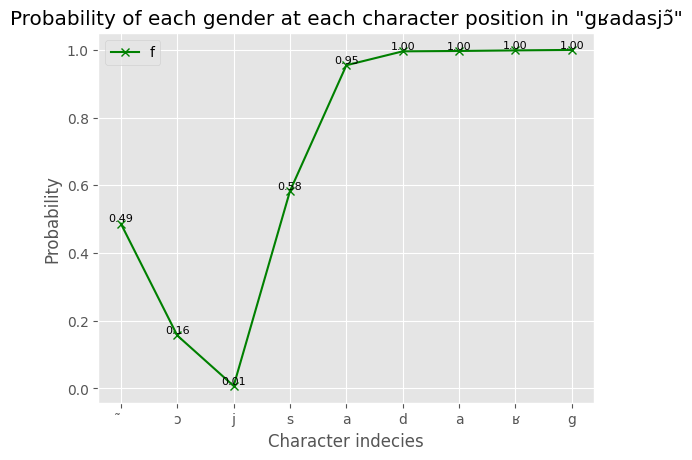

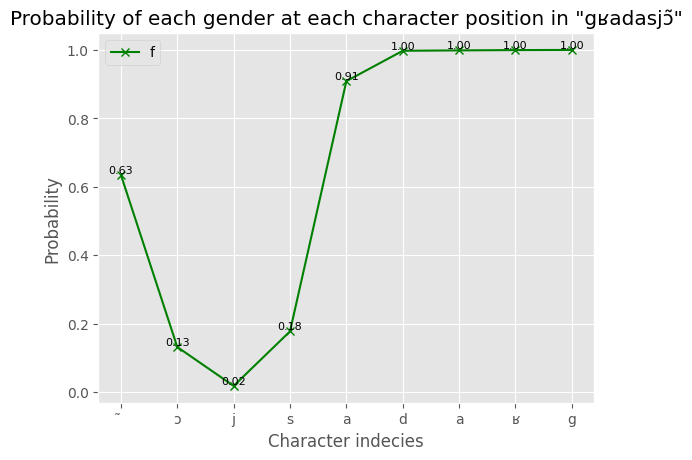

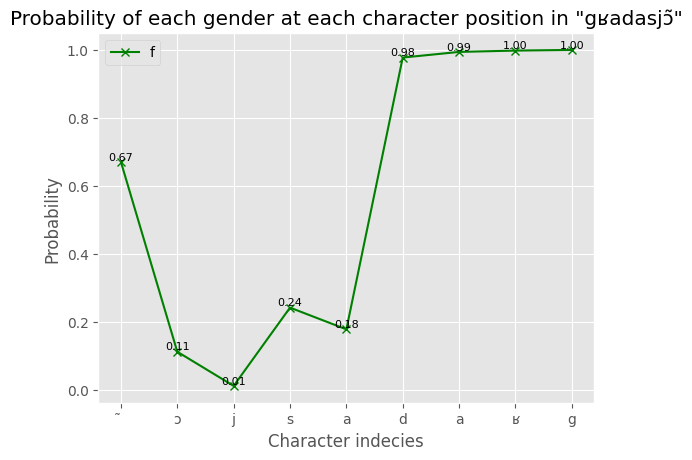

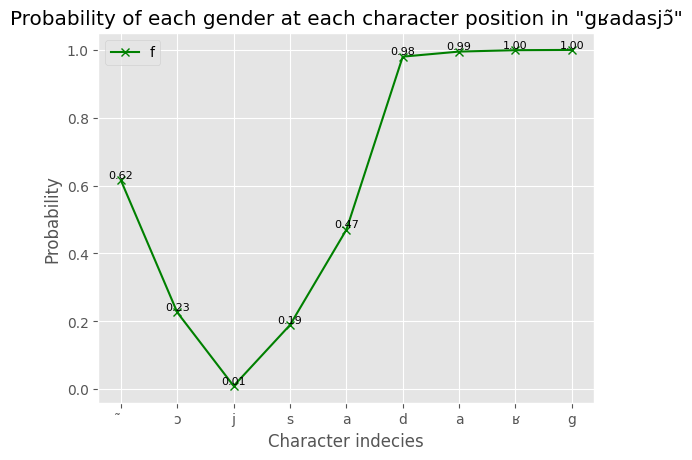

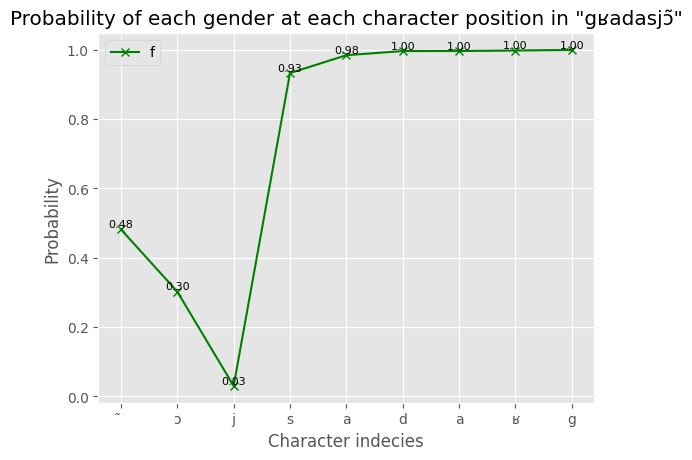

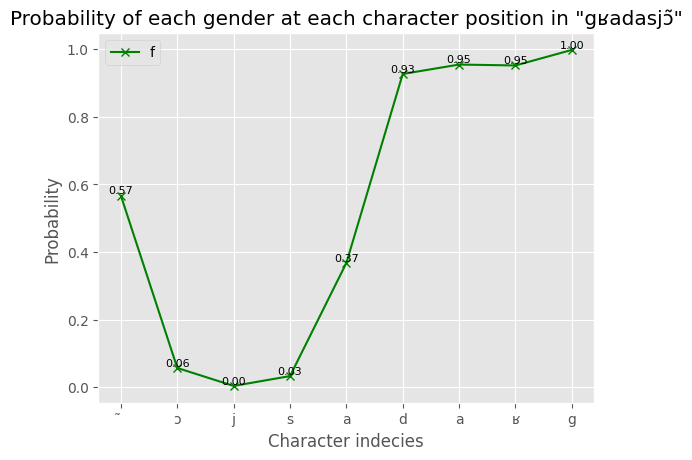

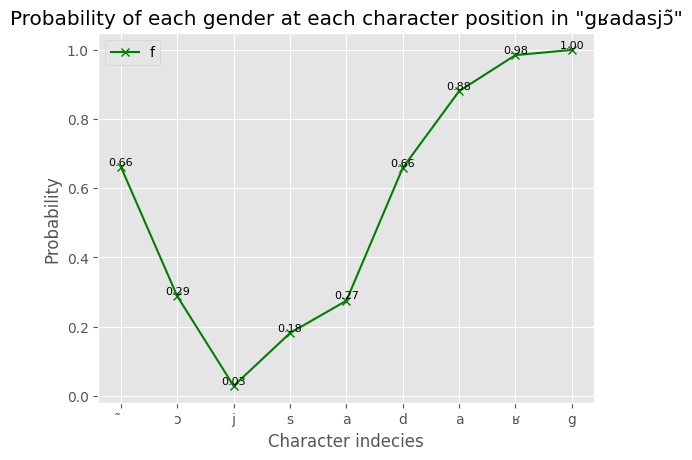

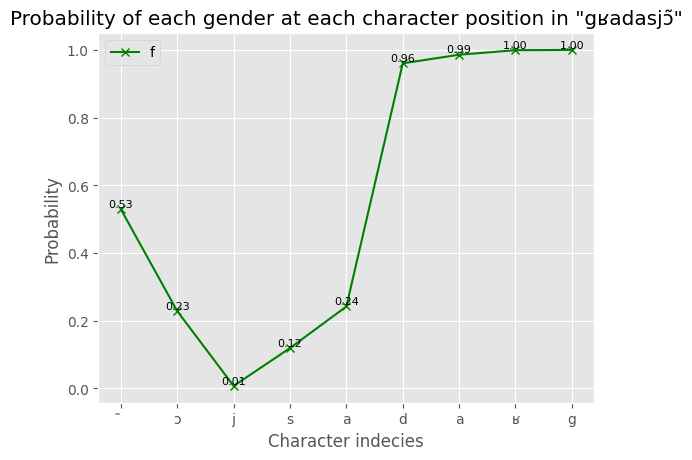

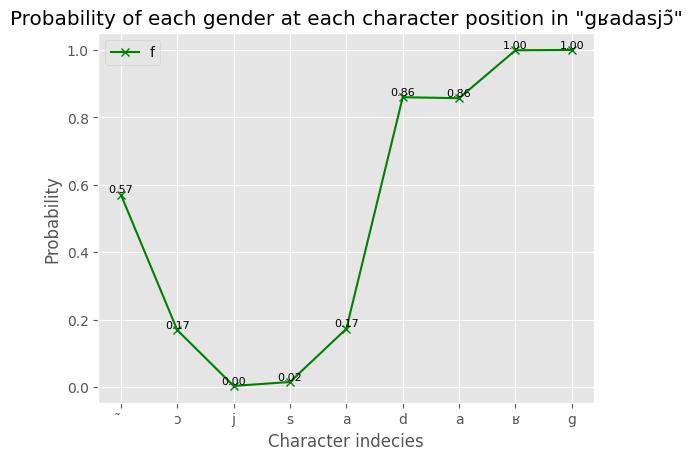

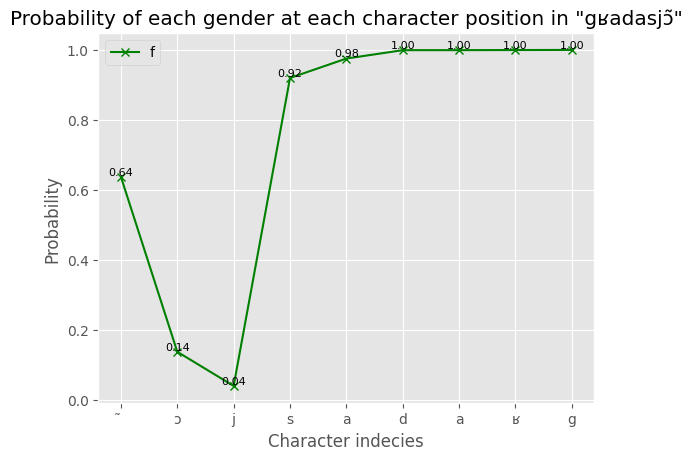

In [22]:
view_plateau('gʁadasjɔ̃', phon_preds_x10, binary=True)